In [1]:
%matplotlib inline
import numpy as np
from pymatgen.io.vasp.outputs import Vasprun
from pymatgen.electronic_structure.core import Spin, Orbital, OrbitalType
import matplotlib.pyplot as plt
import os
from MAUtil import *
# import pymatgen.electronic_structure.dos

In [17]:
def get_dos_info(str_num, site_type):
    site_spd_dos = cdos.get_site_spd_dos(structure[str_num])
    dos = site_spd_dos[OrbitalType[site_type]].densities[Spin.up]
    ene = site_spd_dos[OrbitalType[site_type]].energies
    
    ##### code from DFT book by J. Kitchin #####
    Nstates = np.trapz(dos, ene)
    occupied = ene <= 0.0
    N_occupied_states = np.trapz(dos[occupied], ene[occupied])
    # first moment
    ed = np.trapz(ene * dos, ene) / Nstates

    # second moment
    wd2 = np.trapz(ene**2 * dos, ene) / Nstates

    print('Total # states = {0:1.2f}'.format(Nstates))
    print('number of occupied states = {0:1.2f}'.format(N_occupied_states))
    print('d-band center = {0:1.2f} eV'.format(ed))
    print('d-band width  = {0:1.2f} eV'.format(np.sqrt(wd2)))

    # plot the d-band
    plt.plot(ene, dos, label='$d$-orbitals')

    # plot the occupied states in shaded gray
    plt.fill_between(x=ene[occupied],
                     y1=dos[occupied],
                     y2=np.zeros(dos[occupied].shape),
                     color='gray', alpha=0.25)

    plt.xlabel('$E - E_f$ (eV)')
    plt.ylabel('DOS (arbitrary units)')
    plt.legend(site_type)
    plt.show()
    ##### code from DFT book by J. Kitchin #####
    
    return Nstates, dos, ene

In [19]:
name = 'Cu_111_u2_no01_CO_n1_d8.traj'
name = 'Cu_111_u2_no08_CO_n1_d8.traj'
name = 'Cu_111_u2_no15_CO_n1_d8.traj'
# name = 'Cu_111_u2_no20_CO_n1_d8.traj'
# name = 'Pt_111_u2_no01_CO_n1_d9.traj'
# name = 'Pt_111_u2_no08_CO_n1_d9.traj'
# name = 'Pt_111_u2_no15_CO_n1_d9.traj'
# name = 'Pt_111_u2_no20_CO_n1_d9.traj'
atoms =query(name, 'spacom')

Total # states = 9.96
number of occupied states = 9.57
d-band center = -2.88 eV
d-band width  = 3.24 eV


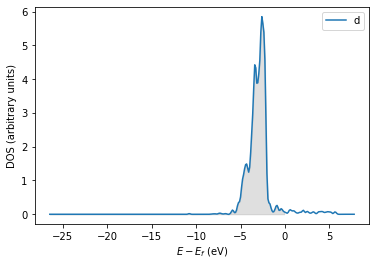

Total # states = 10.13
number of occupied states = 9.58
d-band center = -3.38 eV
d-band width  = 3.86 eV


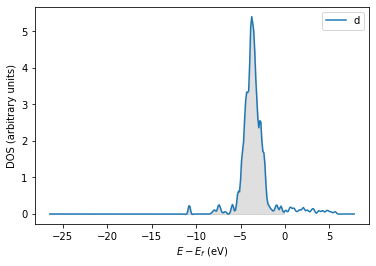

In [25]:
v = Vasprun("./Cu_111_u2_no08_CO_n1_d8/vasprun.xml")
cdos = v.complete_dos
structure = cdos.structure

# str_num: 1~11:lower layer, 12:[0,0,0], 13~15:other str_num = 15, 16:C, 17:O
str_num = 12
site_type = 'd'

for i in range(12,14): # len(structure)
    Nstate, dos, ene = get_dos_info(i, site_type)

Total # states = 2.44
number of occupied states = 1.45
d-band center = -4.56 eV
d-band width  = 8.74 eV


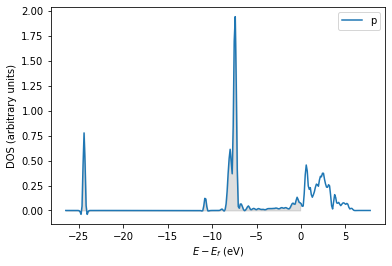

In [26]:
v = Vasprun("./Cu_111_u2_no08_CO_n1_d8/vasprun.xml")
cdos = v.complete_dos
structure = cdos.structure

# str_num: 1~11:lower layer, 12:[0,0,0], 13~15:other str_num = 15, 16:C, 17:O
str_num = 12
site_type = 'p'

for i in range(16,17): # len(structure)
    Nstate, dos, ene = get_dos_info(i, site_type)

Total # states = 9.03
number of occupied states = 8.01
d-band center = -2.17 eV
d-band width  = 2.98 eV


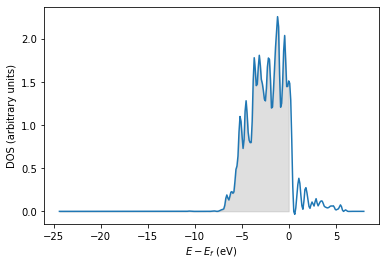

Total # states = 9.11
number of occupied states = 8.00
d-band center = -2.34 eV
d-band width  = 3.41 eV


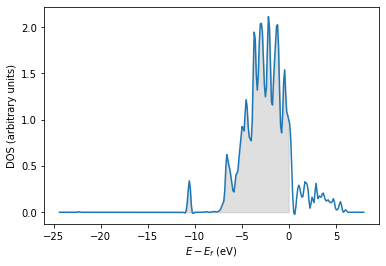

Total # states = 9.11
number of occupied states = 8.00
d-band center = -2.34 eV
d-band width  = 3.41 eV


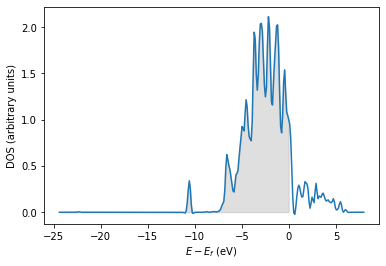

Total # states = 9.11
number of occupied states = 8.00
d-band center = -2.34 eV
d-band width  = 3.41 eV


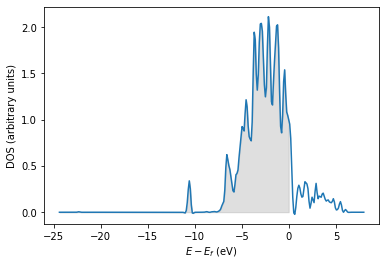

In [51]:
# name = 'Pt_111_u2_no01_CO_n1_d9.traj'
# name = 'Pt_111_u2_no08_CO_n1_d9.traj'
# name = 'Pt_111_u2_no15_CO_n1_d9.traj'
# name = 'Pt_111_u2_no20_CO_n1_d9.traj'
v = Vasprun("./Pt_111_u2_no20_CO_n1_d9/vasprun.xml")
cdos = v.complete_dos
structure = cdos.structure

# str_num: 1~11:lower layer, 12:[0,0,0], 13~15:other str_num = 15, 16:C, 17:O
str_num = 12
site_type = 'd'

for i in range(12,16): # len(structure)
    Nstate, dos, ene = get_dos_info(i, site_type)